In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


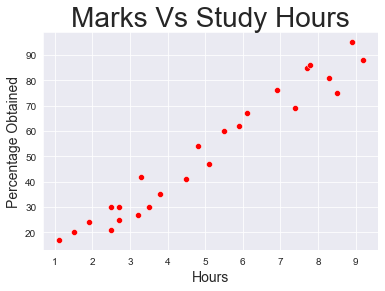

In [5]:
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'],color='red')
plt.title('Marks Vs Study Hours',size=28)
plt.ylabel('Percentage Obtained', size=14)
plt.xlabel('Hours', size=14)
plt.show()

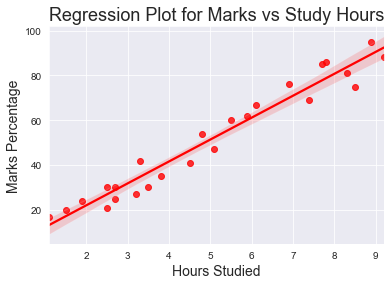

In [6]:
sns.regplot(y = df['Scores'] , x =df["Hours"], color = 'red')
plt.title('Regression Plot for Marks vs Study Hours',size=18)
plt.ylabel('Marks Percentage', size=14)
plt.xlabel('Hours Studied', size=14)
plt.show()

In [7]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [11]:
lm=LinearRegression()
lm

LinearRegression()

In [12]:
X=df[["Hours"]]
Y=df["Scores"]

In [13]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [14]:
Y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [15]:

lm.fit(X,Y)

LinearRegression()

In [16]:
pred_y = lm.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,17.147378
1,3.2,33.766244
2,7.4,74.824618
3,2.5,26.923182
4,5.9,60.160913
5,3.8,39.631726
6,1.9,21.057700


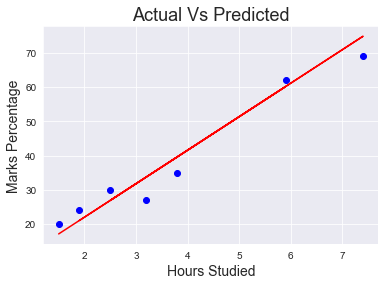

In [17]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Red')
plt.title('Actual Vs Predicted', size=18)
plt.ylabel('Marks Percentage', size=14)
plt.xlabel('Hours Studied', size=14)
plt.show()

In [18]:
hours = [9.25]
answer = lm.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 92.91


In [19]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  3.9904879158106015
